# Assignment 5
## Due May 29th
## Jennifer Them, Florence Lopez

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

np.random.seed(42)

## Exercise 1

### a)

In [38]:
candy = pd.read_csv("candy-data.csv")

In [47]:
names = candy.loc[:, 'competitorname']
Y = candy.loc[:, 'chocolate']
X = candy.loc[:, 'fruity'::]

### b)

In [51]:
length = candy.shape[0]
ind = np.floor(length/3)
X_train = X.values[: int(2*ind)]
Y_train = Y.values[: int(2*ind)]
X_test = X.values[int(2*ind):]
Y_test = Y.values[int(2*ind):]
X_train.shape, X_test.shape

((56, 11), (29, 11))

### c)

In [61]:
c = LogisticRegression() 
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)
Y_pred.shape

(29,)

In [72]:
# compute accuracy 
count = list(np.array(Y_pred == Y_test))
trues = count.count(1)
accuracy = trues/Y_pred.shape[0]
accuracy

0.8275862068965517

### d)

In [78]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = {'C': Cs}
clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_train_score']
accuracy_cv

array([0.46420104, 0.49122807, 0.9374111 , 0.96420104, 0.99099099,
       1.        , 1.        ])

In [80]:
test_accuracies = []
for param in Cs: 
    c = LogisticRegression(C = param) 
    c.fit(X_train, Y_train)
    Y_pred = c.predict(X_test)
    Y_pred.shape
    accuracy = c.score(X_test, Y_test)
    test_accuracies.append(accuracy)
test_accuracies

[0.3793103448275862,
 0.41379310344827586,
 0.8275862068965517,
 0.8275862068965517,
 0.8275862068965517,
 0.8620689655172413,
 0.7931034482758621]

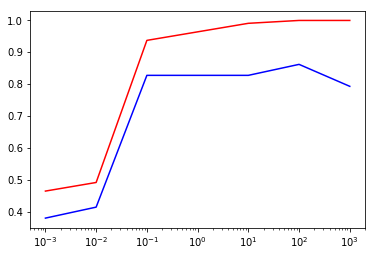

In [82]:
plt.figure()
plt.semilogx(Cs, accuracy_cv, c="red")
plt.semilogx(Cs, test_accuracies, c="blue")

C = 100 seems to work the best, since it produces the highest cv and test accuracy.

## Exercise 2

In [98]:
X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=300, class_sep=1)
X_train, Y_train = X[:300], Y[:300]
X_test, Y_test = X[300:], Y[300:]
X_train[:, 0].shape, X_train[:, 1].shape

((300,), (300,))

### a)

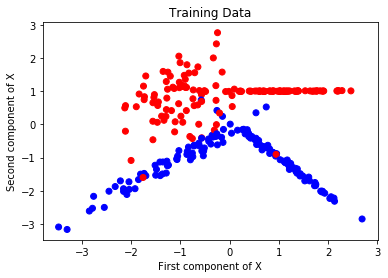

In [102]:
# plot training dataset
colors = ['red' if value == 1 else 'blue' for value in Y_train]
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)
plt.title('Training Data')
plt.xlabel('First component of X')
plt.ylabel('Second component of X')

In [108]:
# apply SVM 
c = LinearSVC()
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)
accuracy = c.score(X_test, Y_test)
accuracy

0.9428571428571428

In [109]:
# make meshgrid
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [113]:
# plot contours
def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return plt.contourf(xx, yy, Z, **params)

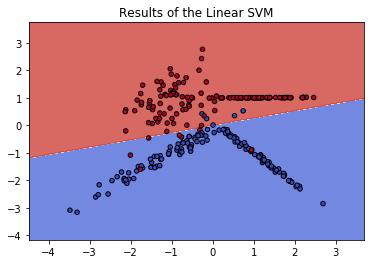

In [122]:
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(c, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Results of the Linear SVM')

### b)

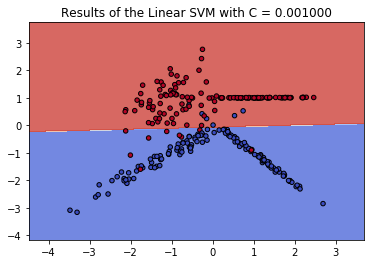

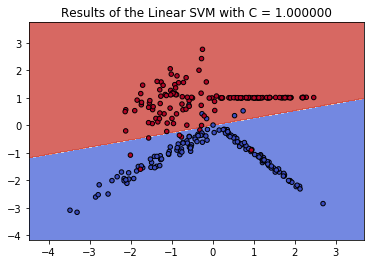

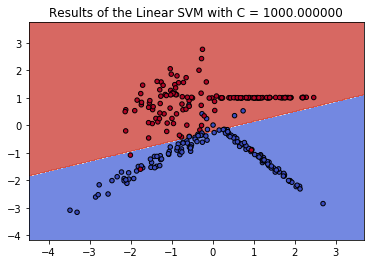

In [139]:
Cs = [0.001, 1, 1000]
errors = []
for param in Cs: 
    c = LinearSVC(C=param)
    c.fit(X_train, Y_train)
    error = c.score(X_train, Y_train)
    errors.append(error)
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(c, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Results of the Linear SVM with C = %f' %param)
    plt.show()

In [140]:
# training errors
errors

[0.9466666666666667, 0.9533333333333334, 0.9566666666666667]

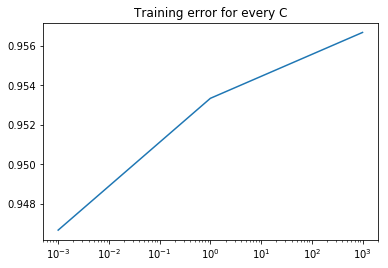

In [141]:
# plot training errors
plt.figure()
plt.semilogx(Cs, errors)
plt.title('Training error for every C')

### c)

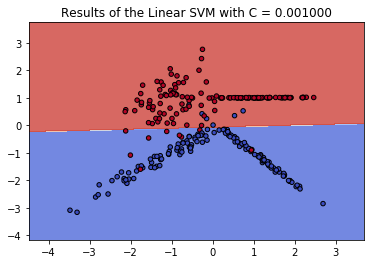

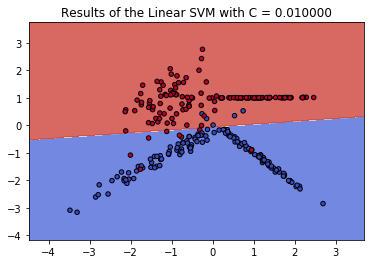

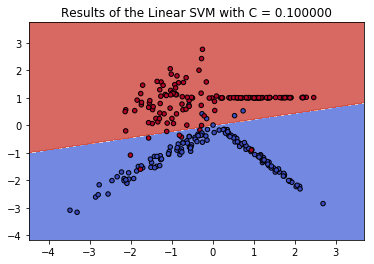

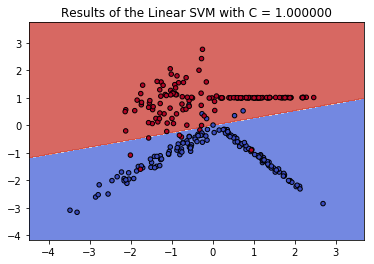

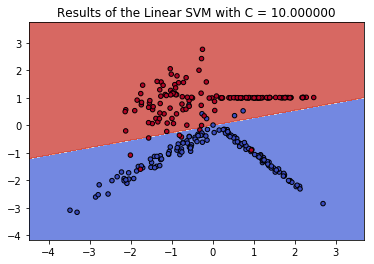

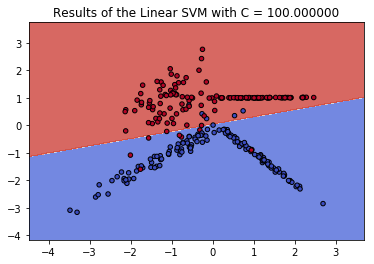

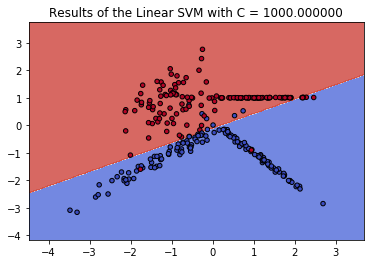

In [144]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
errors = []
for param in Cs: 
    c = LinearSVC(C=param)
    c.fit(X_train, Y_train)
    error = c.score(X_test, Y_test)
    errors.append(error)
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(c, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Results of the Linear SVM with C = %f' %param)
    plt.show() # TODO: plot accuracy

### d)

In [148]:
with open("dataset_1.pickle", "rb") as f:
    X_1, Y_1 = pickle.load(f)
X_1_train, Y_1_train = X_1[:100], Y_1[:100]
X_1_test, Y_1_test = X_1[100:], Y_1[100:]

(100, 2)

In [146]:
with open("dataset_2.pickle", "rb") as f:
    X_2, Y_2 = pickle.load(f)
X_2_train, Y_2_train = X_2[:100], Y_2[:100]
X_2_test, Y_2_test = X_2[100:], Y_2[100:]

In [147]:
# apply SVM to X_1
c = LinearSVC()
c.fit(X_1_train, Y_1_train)
Y_pred = c.predict(X_1_test)
accuracy = c.score(X_1_test, Y_1_test)
accuracy

0.9933333333333333

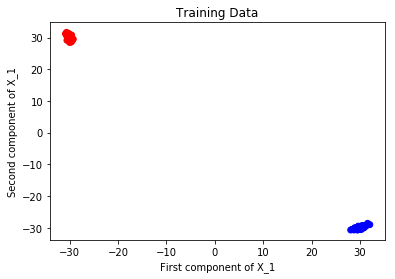

In [149]:
# plot X_1_train
colors = ['red' if value == 1 else 'blue' for value in Y_1_train]
plt.figure()
plt.scatter(X_1_train[:, 0], X_1_train[:, 1], c=colors)
plt.title('Training Data')
plt.xlabel('First component of X_1')
plt.ylabel('Second component of X_1')

In [150]:
# apply SVM to X_2
c = LinearSVC()
c.fit(X_2_train, Y_2_train)
Y_pred = c.predict(X_2_test)
accuracy = c.score(X_2_test, Y_2_test)
accuracy

0.79

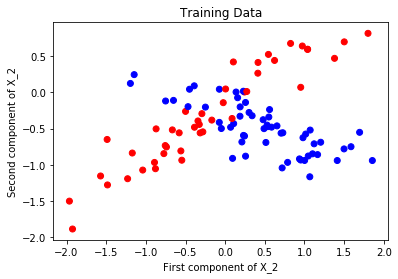

In [151]:
# plot X_2_train
colors = ['red' if value == 1 else 'blue' for value in Y_2_train]
plt.figure()
plt.scatter(X_2_train[:, 0], X_2_train[:, 1], c=colors)
plt.title('Training Data')
plt.xlabel('First component of X_2')
plt.ylabel('Second component of X_2')

### Observation: The accuracy for X_1 and Y_1 is higher, since the data seems to be better separable as one can see in the plot. This is not the case for X_2 and Y_2, since the datapoints for the different classes are somehow overlapping and not easy to separate.